## Data description: 

- phoneNumber: Phone number of the	user (masked)
- Id: ID for the user who has the SMS	
- updateAt: Datetime, when the SMS data was updated in the database. This is not the timestamp when the SMS was received	
- senderAddress: Code of the SMS data sender, can be used to club the sender details.	
- Text: Actual text of the SMS


## Importing all the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
import re
%matplotlib inline 

In [2]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_excel('sms_data.xlsx',sheet_name='Sheet1')
df

phoneNumber                                    id  \
0       xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
1       xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
2       xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
3       xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
4       xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
...            ...                                   ...   
100238  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
100239  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
100240  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
100241  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   
100242  xx86412509  3d368683-a2a5-4c96-88c0-8c7a3ac8bdc5   

                            updateAt  senderAddress  \
0       Sat, 7 May 2022 19:48:00 UTC      JK-SmplPL   
1       Sat, 7 May 2022 19:48:00 UTC      VP-ViCARE   
2       Sat, 7 May 2022 19:48:00 UTC      VP-612345   
3       Sat, 7 May 2022 19:48:00 UTC      BP-ACKOGI   
4       Sat, 7 May 2022 19:48:00 UTC      VP-ViCARE   
...                              ...            ...   
100238  Wed, 4 May 2022 07:14:44 UTC      JD-AKAMAH   
100239  Wed, 4 May 2022 07:14:44 UTC  +917986412509   
100240  Wed, 4 May 2022 07:14:44 UTC  +919417271313   
100241  Wed, 4 May 2022 07:14:44 UTC  +917986412509   
100242  Wed, 4 May 2022 07:14:44 UTC  +917986412509   

                                                     text  
0       Rs.95.15 on Zomato charged via Simpl.\n--\nFoo...  
1       Hi! Update your email id through WhatsApp: htt...  
2       Lucknow ya Kolkata ? - watch it LIVE with Vi c...  
3       Mohd,\nCheck the incredible Acko insurance pol...  
4       Hi! You can now get your Vi prepaid invoice em...  
...                                                   ...  
100238  As we celebrate Azadi Ka Amrit Mahotsav, let's...  
100239  Dear Customer, +917986412509 is now available ...  
100240  Dear Customer, +919417271313 is now available ...  
100241  Dear Customer, +917986412509 is now available ...  
100242  Dear Customer, +917986412509 is now available ...  

[100243 rows x 5 columns]

In [4]:
df.head(25)

phoneNumber                                    id  \
0   xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
1   xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
2   xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
3   xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
4   xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
5   xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
6   xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
7   xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
8   xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
9   xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
10  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
11  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
12  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
13  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
14  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
15  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
16  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
17  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
18  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
19  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
20  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
21  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
22  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
23  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   
24  xx39973810  baa1668c-049e-4118-938e-cc804f1e73aa   

                        updateAt senderAddress  \
0   Sat, 7 May 2022 19:48:00 UTC     JK-SmplPL   
1   Sat, 7 May 2022 19:48:00 UTC     VP-ViCARE   
2   Sat, 7 May 2022 19:48:00 UTC     VP-612345   
3   Sat, 7 May 2022 19:48:00 UTC     BP-ACKOGI   
4   Sat, 7 May 2022 19:48:00 UTC     VP-ViCARE   
5   Sat, 7 May 2022 19:48:00 UTC     TM-BYJUSC   
6   Sat, 7 May 2022 19:48:00 UTC     VP-611123   
7   Sat, 7 May 2022 19:48:00 UTC     JM-ZOMATO   
8   Sat, 7 May 2022 19:48:00 UTC     AX-PAYTMB   
9   Sat, 7 May 2022 19:48:00 UTC     BP-iPaytm   
10  Sat, 7 May 2022 19:48:00 UTC     JM-ZOMATO   
11  Sat, 7 May 2022 19:48:00 UTC     CP-SmplPL   
12  Sat, 7 May 2022 19:48:00 UTC     VP-VFCARE   
13  Sat, 7 May 2022 19:48:00 UTC     JK-SMPLPY   
14  Sat, 7 May 2022 19:48:00 UTC     VM-ZOMATO   
15  Sat, 7 May 2022 19:48:00 UTC     VM-ZOMATO   
16  Sat, 7 May 2022 19:48:00 UTC     CP-SmplPL   
17  Sat, 7 May 2022 19:48:00 UTC     TM-ZOMATO   
18  Sat, 7 May 2022 19:48:00 UTC      59039200   
19  Sat, 7 May 2022 19:48:00 UTC         51471   
20  Sat, 7 May 2022 19:48:00 UTC     AD-ZOMATO   
21  Sat, 7 May 2022 19:48:00 UTC      59039002   
22  Sat, 7 May 2022 19:48:00 UTC      57575791   
23  Sat, 7 May 2022 19:48:00 UTC     VM-SWIGGY   
24  Sat, 7 May 2022 19:48:00 UTC     AX-swiggy   

                                                 text  
0   Rs.95.15 on Zomato charged via Simpl.\n--\nFoo...  
1   Hi! Update your email id through WhatsApp: htt...  
2   Lucknow ya Kolkata ? - watch it LIVE with Vi c...  
3   Mohd,\nCheck the incredible Acko insurance pol...  
4   Hi! You can now get your Vi prepaid invoice em...  
5   Last few hours to apply for BYJU'S Aptitude Te...  
6   Extra Data, ONLY on Rs299! Recharge NOW with R...  
7   <#> 704982 is your Zomato verification code. E...  
8   Received Rs.600.00 in your a/c 91XX3635 from O...  
9   Count#1: Rs 600 paid by 98XXXX4000 at 12:20 AM...  
10  <#> 388779 is your Zomato verification code. E...  
11  Rs.209.0 for Vodafone Idea, Mobile Number 9517...  
12  Rs209 recharged! Enjoy Unlimited Calls to All ...  
13  Simpl OTP: 2083\n-\nUnless opted-out, you agre...  
14  Dear Mohd salman, Thanks for registering with ...  
15  Dear Mohd salman, Thanks for registering with ...  
16  Rs.188.0 on Zomato charged via Simpl.\n--\nFoo...  
17  Your verification OTP on Zomato is 869692. -ZO...  
18  Use 802667 for two-factor authentication on Fa...  
19       Your Messenger verification code is G-694665  
20  282629 is the OTP to login to your Zomato acco...  
21  Your Uber

In [5]:
df.describe()

phoneNumber                                    id  \
count       100243                                100243   
unique          93                                    93   
top     xx31026369  72b90e8a-1960-44f6-9bfc-a19a9410bd47   
freq          7880                                  7880   

                             updateAt senderAddress  \
count                          100243        100243   
unique                            138          8929   
top     Wed, 11 May 2022 09:50:29 UTC     TX-SFXRDR   
freq                             2001          3401   

                                                     text  
count                                              100237  
unique                                              59373  
top     We are unable to get your location. Location i...  
freq                                                 1151

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100243 entries, 0 to 100242
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   phoneNumber    100243 non-null  object
 1   id             100243 non-null  object
 2   updateAt       100243 non-null  object
 3   senderAddress  100243 non-null  object
 4   text           100237 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


#### We can see that in the count section for all columns the count is 100243 but for text its 100237, this indicates there can be empty text cells. 

In [7]:
df.isnull().sum()

phoneNumber      0
id               0
updateAt         0
senderAddress    0
text             6
dtype: int64

#### Thus there are 6 null values in the text set and since we are very interested only in the text messages, therefore we can drop all the rows with null text field.

In [8]:
df.dropna(subset=['text'],inplace= True)

In [9]:
df.isnull().sum()

phoneNumber      0
id               0
updateAt         0
senderAddress    0
text             0
dtype: int64

In [10]:
df.describe()

phoneNumber                                    id  \
count       100237                                100237   
unique          93                                    93   
top     xx31026369  72b90e8a-1960-44f6-9bfc-a19a9410bd47   
freq          7880                                  7880   

                             updateAt senderAddress  \
count                          100237        100237   
unique                            138          8929   
top     Wed, 11 May 2022 09:50:29 UTC     TX-SFXRDR   
freq                             2001          3401   

                                                     text  
count                                              100237  
unique                                              59373  
top     We are unable to get your location. Location i...  
freq                                                 1151

In [11]:
col_names=df.columns.tolist()

In [12]:
col_names

['phoneNumber', 'id', 'updateAt', 'senderAddress', 'text']

#### Since we know that timestaps (or updateAt) and text will be unique and also not singleton columns thus we will find out the unique ids, phonenumber and sender Address 

In [13]:
col_with_groups= ['phoneNumber', 'id', 'senderAddress']
for col in col_with_groups:
    print(df[col].value_counts())
    print('\n')

xx31026369    7880
xx79004549    6003
xx75313460    4002
xx66303163    4002
xx17054730    4002
              ... 
xx91889133       7
xx08714115       5
xx99546752       5
xx77816088       3
xx77998997       1
Name: phoneNumber, Length: 93, dtype: int64


72b90e8a-1960-44f6-9bfc-a19a9410bd47    7880
980b7e48-6e68-495b-a0ab-96a4035da9ef    6003
48454ae9-67a6-42c0-930b-ddc0d916cca7    4002
8503da59-bb3c-4c04-b2b2-9e7da6721ca8    4002
29740414-9029-41ea-b015-a54207b781bd    4002
                                        ... 
144601cb-e8e8-47a1-b3a7-31bfbb4bb6d3       7
27afb651-4ecb-48c8-a8dd-8f07a85458b2       5
5d41e71b-1583-4183-88c0-299073bc4975       5
b11fba2c-1499-469f-b507-cfa43855f4bd       3
f8d98534-abbd-4071-973c-be6ce0351326       1
Name: id, Length: 93, dtype: int64


TX-SFXRDR        3401
AD-SWIGGY        2802
AX-SWIGGY        2663
JT-JioPay        2034
JP-JioPay        1783
                 ... 
+919327368274       1
+918160270501       1
+918851484951       1
+918851482087  

#### As we can see that number of unique items in phoneNumber and id is same so there can be a possibility that two columns are showing the samme uniqueness of the sender.

In [14]:
phone_list=df['phoneNumber'].value_counts().index.tolist()
print(phone_list)
print('\n')
id_list = df['id'].value_counts().index.tolist()
print(id_list)

['xx31026369', 'xx79004549', 'xx75313460', 'xx66303163', 'xx17054730', 'xx69382284', 'xx04034645', 'xx80368198', 'xx82258376', 'xx86412509', 'xx74020648', 'xx01310497', 'xx79704208', 'xx99040324', 'xx09285007', 'xx81424237', 'xx92894428', 'xx07558929', 'xx06555706', 'xx08171361', 'xx74031530', 'xx71874144', 'xx00113290', 'xx74344490', 'xx08965418', 'xx83655400', 'xx89253636', 'xx52580389', 'xx83505567', 'xx17492872', 'xx05407636', 'xx04401562', 'xx63893336', 'xx05992608', 'xx81244801', 'xx83141098', 'xx80569279', 'xx19422042', 'xx90595970', 'xx52892129', 'xx77968234', 'xx89128348', 'xx82421254', 'xx94541847', 'xx84596171', 'xx08602357', 'xx14311304', 'xx68888324', 'xx67843924', 'xx52988075', 'xx10044463', 'xx81767512', 'xx79031777', 'xx83159021', 'xx70848155', 'xx05814042', 'xx78882648', 'xx17603906', 'xx20562981', 'xx68838956', 'xx68843175', 'xx85945036', 'xx84396332', 'xx92978041', 'xx18064986', 'xx73660424', 'xx51889440', 'xx09432501', 'xx00674014', 'xx69829544', 'xx06363043', 'xx14

In [15]:
check_dict = {phone_list[i]: id_list[i] for i in range(len(phone_list))}

In [16]:
correct=0
incorrect=0
for i in range(len(df)):
    num=df.iloc[i]['phoneNumber']
    df_id=df.iloc[i]['id']
    if check_dict[num]==df_id:
        correct+=1
    else :
        incorrect+=1
        
print(correct)
print(incorrect)

100237
0


#### Hence proved that the columns (id and phoneNumber) represent the same uniqueness of the row and thus either one column can be dropped, usually the phone number column is dropped but we will drop the id column so that we can do more analysis on the phone numbers and the id column occupies more space so it will be storage efficient as well, for practical purposes i would recommend dropping the phoneNumber column

In [17]:
df.drop(labels=['id'],axis=1,inplace=True)
df

phoneNumber                      updateAt  senderAddress  \
0       xx39973810  Sat, 7 May 2022 19:48:00 UTC      JK-SmplPL   
1       xx39973810  Sat, 7 May 2022 19:48:00 UTC      VP-ViCARE   
2       xx39973810  Sat, 7 May 2022 19:48:00 UTC      VP-612345   
3       xx39973810  Sat, 7 May 2022 19:48:00 UTC      BP-ACKOGI   
4       xx39973810  Sat, 7 May 2022 19:48:00 UTC      VP-ViCARE   
...            ...                           ...            ...   
100238  xx86412509  Wed, 4 May 2022 07:14:44 UTC      JD-AKAMAH   
100239  xx86412509  Wed, 4 May 2022 07:14:44 UTC  +917986412509   
100240  xx86412509  Wed, 4 May 2022 07:14:44 UTC  +919417271313   
100241  xx86412509  Wed, 4 May 2022 07:14:44 UTC  +917986412509   
100242  xx86412509  Wed, 4 May 2022 07:14:44 UTC  +917986412509   

                                                     text  
0       Rs.95.15 on Zomato charged via Simpl.\n--\nFoo...  
1       Hi! Update your email id through WhatsApp: htt...  
2       Lucknow ya Kolkata ? - watch it LIVE with Vi c...  
3       Mohd,\nCheck the incredible Acko insurance pol...  
4       Hi! You can now get your Vi prepaid invoice em...  
...                                                   ...  
100238  As we celebrate Azadi Ka Amrit Mahotsav, let's...  
100239  Dear Customer, +917986412509 is now available ...  
100240  Dear Customer, +919417271313 is now available ...  
100241  Dear Customer, +917986412509 is now available ...  
100242  Dear Customer, +917986412509 is now available ...  

[100237 rows x 4 columns]

#### Will now convert the updateAt col to a more suitable and understandable format which we'll increase readability and accessbility in the dataframe

In [18]:
db_update=df['updateAt'].tolist()
db_update

['Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 May 2022 19:48:00 UTC',
 'Sat, 7 M

In [19]:
up_list=[]
for i in db_update:
    l=i.split(",")
    up_list.append(l)
up_list    

[['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7 May 2022 19:48:00 UTC'],
 ['Sat', ' 7

In [20]:
day_list = [item[0] for item in up_list]
print(day_list)

['Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Sat', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue', 'Tue'

In [21]:
date_time= [item[1] for item in up_list]
date_time

[' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 19:48:00 UTC',
 ' 7 May 2022 

In [22]:
del up_list

In [23]:
date_list=[]
time_list=[]
date_reg =r'\s[0-9]{1,2}\s[A-Za-z]+\s\d{4}'
for i in date_time:
    x=re.findall(date_reg,i)
    date_list.append(x[0].lstrip())
    y= re.split(date_reg,i)
    time_list.append(y[1].lstrip())


In [24]:
print(date_list)

['7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '7 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 May 2022', '3 Ma

In [25]:
print(time_list)

['19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '19:48:00 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:39 UTC', '08:53:

In [26]:
df['time']=time_list
df['date']=date_list
df

phoneNumber                      updateAt  senderAddress  \
0       xx39973810  Sat, 7 May 2022 19:48:00 UTC      JK-SmplPL   
1       xx39973810  Sat, 7 May 2022 19:48:00 UTC      VP-ViCARE   
2       xx39973810  Sat, 7 May 2022 19:48:00 UTC      VP-612345   
3       xx39973810  Sat, 7 May 2022 19:48:00 UTC      BP-ACKOGI   
4       xx39973810  Sat, 7 May 2022 19:48:00 UTC      VP-ViCARE   
...            ...                           ...            ...   
100238  xx86412509  Wed, 4 May 2022 07:14:44 UTC      JD-AKAMAH   
100239  xx86412509  Wed, 4 May 2022 07:14:44 UTC  +917986412509   
100240  xx86412509  Wed, 4 May 2022 07:14:44 UTC  +919417271313   
100241  xx86412509  Wed, 4 May 2022 07:14:44 UTC  +917986412509   
100242  xx86412509  Wed, 4 May 2022 07:14:44 UTC  +917986412509   

                                                     text          time  \
0       Rs.95.15 on Zomato charged via Simpl.\n--\nFoo...  19:48:00 UTC   
1       Hi! Update your email id through WhatsApp: htt...  19:48:00 UTC   
2       Lucknow ya Kolkata ? - watch it LIVE with Vi c...  19:48:00 UTC   
3       Mohd,\nCheck the incredible Acko insurance pol...  19:48:00 UTC   
4       Hi! You can now get your Vi prepaid invoice em...  19:48:00 UTC   
...                                                   ...           ...   
100238  As we celebrate Azadi Ka Amrit Mahotsav, let's...  07:14:44 UTC   
100239  Dear Customer, +917986412509 is now available ...  07:14:44 UTC   
100240  Dear Customer, +919417271313 is now available ...  07:14:44 UTC   
100241  Dear Customer, +917986412509 is now available ...  07:14:44 UTC   
100242  Dear Customer, +917986412509 is now available ...  07:14:44 UTC   

              date  
0       7 May 2022  
1       7 May 2022  
2       7 May 2022  
3       7 May 2022  
4       7 May 2022  
...            ...  
100238  4 May 2022  
100239  4 May 2022  
100240  4 May 2022  
100241  4 May 2022  
100242  4 May 2022  

[100237 rows x 6 columns]

In [27]:
df.drop(['updateAt'],axis=1,inplace=True)

In [28]:
df

phoneNumber  senderAddress  \
0       xx39973810      JK-SmplPL   
1       xx39973810      VP-ViCARE   
2       xx39973810      VP-612345   
3       xx39973810      BP-ACKOGI   
4       xx39973810      VP-ViCARE   
...            ...            ...   
100238  xx86412509      JD-AKAMAH   
100239  xx86412509  +917986412509   
100240  xx86412509  +919417271313   
100241  xx86412509  +917986412509   
100242  xx86412509  +917986412509   

                                                     text          time  \
0       Rs.95.15 on Zomato charged via Simpl.\n--\nFoo...  19:48:00 UTC   
1       Hi! Update your email id through WhatsApp: htt...  19:48:00 UTC   
2       Lucknow ya Kolkata ? - watch it LIVE with Vi c...  19:48:00 UTC   
3       Mohd,\nCheck the incredible Acko insurance pol...  19:48:00 UTC   
4       Hi! You can now get your Vi prepaid invoice em...  19:48:00 UTC   
...                                                   ...           ...   
100238  As we celebrate Azadi Ka Amrit Mahotsav, let's...  07:14:44 UTC   
100239  Dear Customer, +917986412509 is now available ...  07:14:44 UTC   
100240  Dear Customer, +919417271313 is now available ...  07:14:44 UTC   
100241  Dear Customer, +917986412509 is now available ...  07:14:44 UTC   
100242  Dear Customer, +917986412509 is now available ...  07:14:44 UTC   

              date  
0       7 May 2022  
1       7 May 2022  
2       7 May 2022  
3       7 May 2022  
4       7 May 2022  
...            ...  
100238  4 May 2022  
100239  4 May 2022  
100240  4 May 2022  
100241  4 May 2022  
100242  4 May 2022  

[100237 rows x 5 columns]

#### Now the data set as been almost cleaned (except text column) and is better represented

## TEXT CLEANING

The Text column will be cleaned in the following steps
- expanding the contractions or abbrevations using a freely availbale list
- removing special characters
- removing stop words

In [29]:
df.iloc[43]['text']

"[OPPO]813353 is your verification code. It expires in 5 minutes. Don't share it with anyone."

Here the word "Don't" is a contraction and thus there can be many to be found we will try to expand them to there original form

In [30]:
import contractions

In [31]:
def fixer(x):
    if type(x) is str:
        t=contractions.fix(x)
    return t

In [32]:
df['text']=df['text'].apply(lambda x : fixer(x))
df['text']=df['text'].str.lower()

In [33]:
df.iloc[43]['text']

'[oppo]813353 is your verification code. it expires in 5 minutes. do not share it with anyone.'

#### Similarly many such incidents would have been expanded, this also helps in we are removing the stop words, as lists of stopwords at times dont include these contractions ( isn't -> is not, is - stopword)

As our task is to find the financial status of the workers and not the sentiment or something that corresponds to the structure of the text so the we can use bigger lists than those available in spacy, nltk, gensim etc.

In [34]:
with open('a.txt', 'r') as f:
    stopwords_list = [line.strip() for line in f]

In [35]:
print(stopwords_list)


['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [36]:
def remove_mystopwords(sentence):
    tokens = sentence.split(" ")
    tokens_filtered= [word for word in tokens if not word in stopwords_list]
    return (" ").join(tokens_filtered)

In [37]:
df['text']=df['text'].apply(lambda x : remove_mystopwords(x))

In [38]:
print(df['text'])

0         rs.95.15 zomato charged simpl.\n--\nfood, groc...
1         hi! update email whatsapp: https://wa.me/messa...
2         lucknow ya kolkata ? - watch live vi cricket p...
3         mohd,\ncheck incredible acko insurance policy ...
4         hi! vi prepaid invoice emailed you, simply cli...
                                ...                        
100238    celebrate azadi ka amrit mahotsav, pride natio...
100239                  dear customer, +917986412509 calls.
100240                  dear customer, +919417271313 calls.
100241                  dear customer, +917986412509 calls.
100242                  dear customer, +917986412509 calls.
Name: text, Length: 100237, dtype: object


## Feature Engineering

### Distribution of Unigram, Bigram and Trigram without STOP Words

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
def get_top_n_words(x,n):
    vec=CountVectorizer().fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq= [(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key = lambda x: x[1], reverse= True)
    return words_freq[:n]

In [41]:
words=get_top_n_words(df['text'],50)

In [42]:
print(words)

[('rs', 40476), ('jio', 27707), ('https', 25147), ('data', 23746), ('00', 22352), ('dear', 19133), ('click', 19005), ('2022', 18580), ('22', 18092), ('bank', 16793), ('in', 16028), ('com', 15503), ('கள', 14744), ('recharge', 14458), ('order', 13912), ('plan', 13586), ('कर', 13569), ('gb', 12977), ('50', 12969), ('earn', 12714), ('upi', 12036), ('inr', 11724), ('www', 11653), ('call', 11074), ('swiggy', 10795), ('app', 10184), ('1991', 9888), ('quota', 9846), ('10', 9663), ('account', 9297), ('airtel', 9262), ('validity', 9029), ('balance', 8914), ('daily', 8899), ('bal', 8620), ('http', 8586), ('number', 8509), ('customer', 8373), ('to', 8220), ('no', 7971), ('login', 7826), ('apr', 7824), ('current', 7544), ('details', 7449), ('be', 7439), ('more', 7178), ('youtu', 7123), ('you', 7079), ('extra', 7029), ('debited', 6997)]


Using the information of top occuring words we get create a new stop words list that would help us remove words that are irrelevant to us and will help us to sort out the import messages as well

In [43]:
new_words= [i[0] for i in words ]
print(new_words)

['rs', 'jio', 'https', 'data', '00', 'dear', 'click', '2022', '22', 'bank', 'in', 'com', 'கள', 'recharge', 'order', 'plan', 'कर', 'gb', '50', 'earn', 'upi', 'inr', 'www', 'call', 'swiggy', 'app', '1991', 'quota', '10', 'account', 'airtel', 'validity', 'balance', 'daily', 'bal', 'http', 'number', 'customer', 'to', 'no', 'login', 'apr', 'current', 'details', 'be', 'more', 'youtu', 'you', 'extra', 'debited']


In [44]:
#stopwords_list.extend(new_words)
stopwords_list

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [45]:
df['text']=df['text'].apply(lambda x : remove_mystopwords(x))

In [46]:
words=get_top_n_words(df['text'],50)

In [47]:
df1 = pd.DataFrame(words,columns=['unigram','frequency'])
df1=df1.set_index('unigram')
print(df1)


          frequency
unigram            
rs            40476
jio           27707
https         25147
data          23746
00            22352
dear          19133
click         19005
2022          18580
22            18092
bank          16793
in            16028
com           15503
கள            14744
recharge      14458
order         13912
plan          13586
कर            13569
gb            12977
50            12969
earn          12714
upi           12036
inr           11724
www           11653
call          11074
swiggy        10795
app           10184
1991           9888
quota          9846
10             9663
account        9297
airtel         9262
validity       9029
balance        8914
daily          8899
bal            8620
http           8586
number         8509
customer       8373
to             8220
no             7971
login          7826
apr            7824
current        7544
details        7449
be             7439
more           7178
youtu          7123
you            7079


/home/rimcrusher/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2965 (\N{TAMIL LETTER KA}) missing from current font.

/home/rimcrusher/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Matplotlib currently does not support Tamil natively.

/home/rimcrusher/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2995 (\N{TAMIL LETTER LLA}) missing from current font.

/home/rimcrusher/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.

/home/rimcrusher/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Matplotlib currently does not support Devanagari natively.

/home/rimcrusher/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.



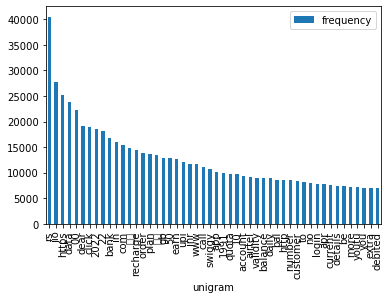

In [48]:
ax=df1.plot.bar()

In [49]:
def get_top_n_words(x,n):
    vec=CountVectorizer(ngram_range=(2,2)).fit(x)
    bow=vec.transform(x)
    sum_words=bow.sum(axis=0)
    words_freq= [(word,sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key = lambda x: x[1], reverse= True)
    return words_freq[:n]

In [50]:
words=get_top_n_words(df['text'],50)

In [51]:
words

[('jio com', 12444),
 ('www jio', 10339),
 ('click https', 9772),
 ('data quota', 9769),
 ('dear customer', 7489),
 ('youtu be', 7123),
 ('https youtu', 7078),
 ('https www', 6233),
 ('bit ly', 6229),
 ('jio number', 5856),
 ('order deliver', 5734),
 ('earn more', 5733),
 ('order surge', 5691),
 ('login earn', 5654),
 ('happy delivering', 5646),
 ('extra order', 5636),
 ('hurray special', 5633),
 ('special order', 5630),
 ('peak timings', 5630),
 ('inr extra', 5630),
 ('deliver timing', 5630),
 ('timing this', 5630),
 ('this structure', 5630),
 ('structure applicable', 5630),
 ('conditions login', 5630),
 ('more swiggy', 5630),
 ('swiggy happy', 5630),
 ('daily data', 5591),
 ('2022 conditions', 5365),
 ('airtel in', 5045),
 ('உங கள', 4910),
 ('balance validity', 4725),
 ('50 gb', 4637),
 ('com dl', 4625),
 ('plan details', 4539),
 ('current balance', 4481),
 ('dial 1991', 4477),
 ('validity plan', 4461),
 ('details exciting', 4461),
 ('exciting recharge', 4461),
 ('recharge plans', 44

In [52]:
with open('banks.txt', 'r') as f:
    banks_list = [line.lstrip().rstrip().lower().split('\t') for line in f]

In [53]:
banks_list

[['abhyudaya_co-operative_bank', 'acb', '*99*87#', 'abhy'],
 ['allahabad_bank', 'alb', '#99*54#', 'alla'],
 ['andhra_bank', 'anb', '*99*59#', 'andb'],
 ['apna_sahakari_bank', 'apn', '*99*85#', 'asbl'],
 ['axis_bank', 'axb', '*99*45#', 'utib'],
 ['bank_of_baroda', 'bob', '*99*48#', 'barb'],
 ['bank_of_india', 'boi', '*99*47#', 'bkid'],
 ['bank_of_maharashtra', 'bom', '*99*61#', 'mahb'],
 ['bhartiya_mahila_bank', 'bmb', '*99*86#', 'bmbl'],
 ['canara_bank', 'cnb', '*99*46#', 'cnrb'],
 ['central_bank_of_india', 'cbi', '*99*51#', 'cbin'],
 ['corporation_bank', 'crb', '*99*57#', 'corp'],
 ['dcb_bank', 'dcb', '*99*65#', 'dcbl'],
 ['dena_bank', 'dnb', '*99*78#', 'bkdn'],
 ['federal_bank', 'fbl', '*99*72#', 'fdrl'],
 ['gujarat_state_co-operative_bank', 'gsc', '*99*90#', 'gscb'],
 ['hasti_co-op_bank', 'hcb', '*99*89#', 'hcbl'],
 ['hdfc_bank', 'hdf', '*99*43#', 'hdfc'],
 ['icici_bank', 'ici', '*99*44#', 'icici'],
 ['idbi_bank', 'idb', '*99*49#', 'ibkl'],
 ['indian_bank', 'inb', '*99*58#', 'idib']

In [54]:
bank_conjection_words = ['bank','&','of', 'of']
b_l=banks_list.copy()
b_l

[['abhyudaya_co-operative_bank', 'acb', '*99*87#', 'abhy'],
 ['allahabad_bank', 'alb', '#99*54#', 'alla'],
 ['andhra_bank', 'anb', '*99*59#', 'andb'],
 ['apna_sahakari_bank', 'apn', '*99*85#', 'asbl'],
 ['axis_bank', 'axb', '*99*45#', 'utib'],
 ['bank_of_baroda', 'bob', '*99*48#', 'barb'],
 ['bank_of_india', 'boi', '*99*47#', 'bkid'],
 ['bank_of_maharashtra', 'bom', '*99*61#', 'mahb'],
 ['bhartiya_mahila_bank', 'bmb', '*99*86#', 'bmbl'],
 ['canara_bank', 'cnb', '*99*46#', 'cnrb'],
 ['central_bank_of_india', 'cbi', '*99*51#', 'cbin'],
 ['corporation_bank', 'crb', '*99*57#', 'corp'],
 ['dcb_bank', 'dcb', '*99*65#', 'dcbl'],
 ['dena_bank', 'dnb', '*99*78#', 'bkdn'],
 ['federal_bank', 'fbl', '*99*72#', 'fdrl'],
 ['gujarat_state_co-operative_bank', 'gsc', '*99*90#', 'gscb'],
 ['hasti_co-op_bank', 'hcb', '*99*89#', 'hcbl'],
 ['hdfc_bank', 'hdf', '*99*43#', 'hdfc'],
 ['icici_bank', 'ici', '*99*44#', 'icici'],
 ['idbi_bank', 'idb', '*99*49#', 'ibkl'],
 ['indian_bank', 'inb', '*99*58#', 'idib']

In [55]:
bank_conjection_words = ['bank','&','of', 'of']
for idx in range(len(bank_conjection_words)):
    for i in b_l:
        words=i[0].split('_')
        print(words)
        for word in words:
            print (word)
            if word == bank_conjection_words[idx]:
                print("removing "+word)
                words.remove(word)
                print(words)
        print(words)
        txt='_'.join(words)
        i[0]=txt

['abhyudaya', 'co-operative', 'bank']
abhyudaya
co-operative
bank
removing bank
['abhyudaya', 'co-operative']
['abhyudaya', 'co-operative']
['allahabad', 'bank']
allahabad
bank
removing bank
['allahabad']
['allahabad']
['andhra', 'bank']
andhra
bank
removing bank
['andhra']
['andhra']
['apna', 'sahakari', 'bank']
apna
sahakari
bank
removing bank
['apna', 'sahakari']
['apna', 'sahakari']
['axis', 'bank']
axis
bank
removing bank
['axis']
['axis']
['bank', 'of', 'baroda']
bank
removing bank
['of', 'baroda']
baroda
['of', 'baroda']
['bank', 'of', 'india']
bank
removing bank
['of', 'india']
india
['of', 'india']
['bank', 'of', 'maharashtra']
bank
removing bank
['of', 'maharashtra']
maharashtra
['of', 'maharashtra']
['bhartiya', 'mahila', 'bank']
bhartiya
mahila
bank
removing bank
['bhartiya', 'mahila']
['bhartiya', 'mahila']
['canara', 'bank']
canara
bank
removing bank
['canara']
['canara']
['central', 'bank', 'of', 'india']
central
bank
removing bank
['central', 'of', 'india']
india
['cent

In [56]:
b_l

[['abhyudaya_co-operative', 'acb', '*99*87#', 'abhy'],
 ['allahabad', 'alb', '#99*54#', 'alla'],
 ['andhra', 'anb', '*99*59#', 'andb'],
 ['apna_sahakari', 'apn', '*99*85#', 'asbl'],
 ['axis', 'axb', '*99*45#', 'utib'],
 ['baroda', 'bob', '*99*48#', 'barb'],
 ['india', 'boi', '*99*47#', 'bkid'],
 ['maharashtra', 'bom', '*99*61#', 'mahb'],
 ['bhartiya_mahila', 'bmb', '*99*86#', 'bmbl'],
 ['canara', 'cnb', '*99*46#', 'cnrb'],
 ['central_india', 'cbi', '*99*51#', 'cbin'],
 ['corporation', 'crb', '*99*57#', 'corp'],
 ['dcb', 'dcb', '*99*65#', 'dcbl'],
 ['dena', 'dnb', '*99*78#', 'bkdn'],
 ['federal', 'fbl', '*99*72#', 'fdrl'],
 ['gujarat_state_co-operative', 'gsc', '*99*90#', 'gscb'],
 ['hasti_co-op', 'hcb', '*99*89#', 'hcbl'],
 ['hdfc', 'hdf', '*99*43#', 'hdfc'],
 ['icici', 'ici', '*99*44#', 'icici'],
 ['idbi', 'idb', '*99*49#', 'ibkl'],
 ['indian', 'inb', '*99*58#', 'idib'],
 ['indian_overseas', 'iob', '*99*52#', 'ioba'],
 ['indusind', 'iib', '*99*69#', 'indb'],
 ['ing_vysya', 'ing', 'na'

In [57]:
# import pickle

# with open('banks_c', 'wb') as fp:
#     pickle.dump(b_l, fp)

In [58]:
# with open ('banks_c', 'rb') as fp:
#     banks_list2 = pickle.load(fp)

In [59]:
# banks_list2

### Few Observations to consider 
* For the financial status we know that any financial update there has to be digits in text message
* People do recieve spam messages from online gaming apps so will remove all messages that have 'game' in text
* The message about financial transactions will have Rs for denoting rupees
* Removing spam messages wrt to credit cards

In [60]:
df = df[df['text'].str.contains('\d')]
df

phoneNumber  senderAddress  \
0       xx39973810      JK-SmplPL   
1       xx39973810      VP-ViCARE   
2       xx39973810      VP-612345   
4       xx39973810      VP-ViCARE   
5       xx39973810      TM-BYJUSC   
...            ...            ...   
100238  xx86412509      JD-AKAMAH   
100239  xx86412509  +917986412509   
100240  xx86412509  +919417271313   
100241  xx86412509  +917986412509   
100242  xx86412509  +917986412509   

                                                     text          time  \
0       rs.95.15 zomato charged simpl.\n--\nfood, groc...  19:48:00 UTC   
1       hi! update email whatsapp: https://wa.me/messa...  19:48:00 UTC   
2       lucknow ya kolkata ? - watch live vi cricket p...  19:48:00 UTC   
4       hi! vi prepaid invoice emailed you, simply cli...  19:48:00 UTC   
5       hours apply byju's aptitude test\n-win 100% sc...  19:48:00 UTC   
...                                                   ...           ...   
100238  celebrate azadi ka amrit mahotsav, pride natio...  07:14:44 UTC   
100239                dear customer, +917986412509 calls.  07:14:44 UTC   
100240                dear customer, +919417271313 calls.  07:14:44 UTC   
100241                dear customer, +917986412509 calls.  07:14:44 UTC   
100242                dear customer, +917986412509 calls.  07:14:44 UTC   

              date  
0       7 May 2022  
1       7 May 2022  
2       7 May 2022  
4       7 May 2022  
5       7 May 2022  
...            ...  
100238  4 May 2022  
100239  4 May 2022  
100240  4 May 2022  
100241  4 May 2022  
100242  4 May 2022  

[90698 rows x 5 columns]

In [61]:
df=df[~df['text'].str.contains('game')]
df

phoneNumber  senderAddress  \
0       xx39973810      JK-SmplPL   
1       xx39973810      VP-ViCARE   
2       xx39973810      VP-612345   
4       xx39973810      VP-ViCARE   
5       xx39973810      TM-BYJUSC   
...            ...            ...   
100238  xx86412509      JD-AKAMAH   
100239  xx86412509  +917986412509   
100240  xx86412509  +919417271313   
100241  xx86412509  +917986412509   
100242  xx86412509  +917986412509   

                                                     text          time  \
0       rs.95.15 zomato charged simpl.\n--\nfood, groc...  19:48:00 UTC   
1       hi! update email whatsapp: https://wa.me/messa...  19:48:00 UTC   
2       lucknow ya kolkata ? - watch live vi cricket p...  19:48:00 UTC   
4       hi! vi prepaid invoice emailed you, simply cli...  19:48:00 UTC   
5       hours apply byju's aptitude test\n-win 100% sc...  19:48:00 UTC   
...                                                   ...           ...   
100238  celebrate azadi ka amrit mahotsav, pride natio...  07:14:44 UTC   
100239                dear customer, +917986412509 calls.  07:14:44 UTC   
100240                dear customer, +919417271313 calls.  07:14:44 UTC   
100241                dear customer, +917986412509 calls.  07:14:44 UTC   
100242                dear customer, +917986412509 calls.  07:14:44 UTC   

              date  
0       7 May 2022  
1       7 May 2022  
2       7 May 2022  
4       7 May 2022  
5       7 May 2022  
...            ...  
100238  4 May 2022  
100239  4 May 2022  
100240  4 May 2022  
100241  4 May 2022  
100242  4 May 2022  

[90150 rows x 5 columns]

In [62]:
df=df.loc[(df['text'].str.contains('rs.')) | (df['text'].str.contains('inr')) ]
df

phoneNumber senderAddress  \
0       xx39973810     JK-SmplPL   
5       xx39973810     TM-BYJUSC   
6       xx39973810     VP-611123   
8       xx39973810     AX-PAYTMB   
9       xx39973810     BP-iPaytm   
...            ...           ...   
100210  xx86412509     AP-650007   
100211  xx86412509     AP-650006   
100212  xx86412509     VP-ViCARE   
100220  xx86412509        650025   
100227  xx86412509     AD-SECRRE   

                                                     text          time  \
0       rs.95.15 zomato charged simpl.\n--\nfood, groc...  19:48:00 UTC   
5       hours apply byju's aptitude test\n-win 100% sc...  19:48:00 UTC   
6       extra data, rs299! recharge rs299 & extra 500m...  19:48:00 UTC   
8       received rs.600.00 a/c 91xx3635 one97 communic...  19:48:00 UTC   
9       count#1: rs 600 paid 98xxxx4000 12:20 am. will...  19:48:00 UTC   
...                                                   ...           ...   
100210  sidharth malhotra ki shershaah karein amazon p...  07:14:44 UTC   
100211  ajay devgan ki bhuj disney+ hotstar vip par ka...  07:14:44 UTC   
100212  stay connected financial, aadhar-based transac...  07:14:44 UTC   
100220  smartphone easy installment rs.699 airtel! \ng...  07:14:44 UTC   
100227  work 30 mins daily mobile phone google earn rs...  07:14:44 UTC   

              date  
0       7 May 2022  
5       7 May 2022  
6       7 May 2022  
8       7 May 2022  
9       7 May 2022  
...            ...  
100210  4 May 2022  
100211  4 May 2022  
100212  4 May 2022  
100220  4 May 2022  
100227  4 May 2022  

[47830 rows x 5 columns]

In [63]:
spam_words = ['offer','apply','congrats','protect','%','complete','bonus','instantly']
for word in spam_words:
    df=df[~df['text'].str.contains(word)]

df

phoneNumber senderAddress  \
0       xx39973810     JK-SmplPL   
6       xx39973810     VP-611123   
8       xx39973810     AX-PAYTMB   
9       xx39973810     BP-iPaytm   
11      xx39973810     CP-SmplPL   
...            ...           ...   
100207  xx86412509     AP-650002   
100210  xx86412509     AP-650007   
100211  xx86412509     AP-650006   
100212  xx86412509     VP-ViCARE   
100227  xx86412509     AD-SECRRE   

                                                     text          time  \
0       rs.95.15 zomato charged simpl.\n--\nfood, groc...  19:48:00 UTC   
6       extra data, rs299! recharge rs299 & extra 500m...  19:48:00 UTC   
8       received rs.600.00 a/c 91xx3635 one97 communic...  19:48:00 UTC   
9       count#1: rs 600 paid 98xxxx4000 12:20 am. will...  19:48:00 UTC   
11      rs.209.0 vodafone idea, mobile number 95179904...  19:48:00 UTC   
...                                                   ...           ...   
100207  rs80 ya usse jyada ke bill bhugtan par payein ...  07:14:44 UTC   
100210  sidharth malhotra ki shershaah karein amazon p...  07:14:44 UTC   
100211  ajay devgan ki bhuj disney+ hotstar vip par ka...  07:14:44 UTC   
100212  stay connected financial, aadhar-based transac...  07:14:44 UTC   
100227  work 30 mins daily mobile phone google earn rs...  07:14:44 UTC   

              date  
0       7 May 2022  
6       7 May 2022  
8       7 May 2022  
9       7 May 2022  
11      7 May 2022  
...            ...  
100207  4 May 2022  
100210  4 May 2022  
100211  4 May 2022  
100212  4 May 2022  
100227  4 May 2022  

[37856 rows x 5 columns]

In [64]:
#df.to_csv('transactional_data.csv', index = False)

### The transactions mostly happen in the following manner:-
* 'debited for' or 'paid' shows spending amount
* 'credited by' shows amount credited in the account
* 'credit card' can possibily give the credit card bill

#### This will be the format in which we will find the amount spend , earned (or credited) for each employee or rider

In [65]:
biz_df = pd.read_csv('transactional_data.csv')
biz_df

phoneNumber senderAddress  \
0      xx39973810     JK-SmplPL   
1      xx39973810     VP-611123   
2      xx39973810     AX-PAYTMB   
3      xx39973810     BP-iPaytm   
4      xx39973810     CP-SmplPL   
...           ...           ...   
37851  xx86412509     AP-650002   
37852  xx86412509     AP-650007   
37853  xx86412509     AP-650006   
37854  xx86412509     VP-ViCARE   
37855  xx86412509     AD-SECRRE   

                                                    text          time  \
0      rs.95.15 zomato charged simpl.\n--\nfood, groc...  19:48:00 UTC   
1      extra data, rs299! recharge rs299 & extra 500m...  19:48:00 UTC   
2      received rs.600.00 a/c 91xx3635 one97 communic...  19:48:00 UTC   
3      count#1: rs 600 paid 98xxxx4000 12:20 am. will...  19:48:00 UTC   
4      rs.209.0 vodafone idea, mobile number 95179904...  19:48:00 UTC   
...                                                  ...           ...   
37851  rs80 ya usse jyada ke bill bhugtan par payein ...  07:14:44 UTC   
37852  sidharth malhotra ki shershaah karein amazon p...  07:14:44 UTC   
37853  ajay devgan ki bhuj disney+ hotstar vip par ka...  07:14:44 UTC   
37854  stay connected financial, aadhar-based transac...  07:14:44 UTC   
37855  work 30 mins daily mobile phone google earn rs...  07:14:44 UTC   

             date  
0      7 May 2022  
1      7 May 2022  
2      7 May 2022  
3      7 May 2022  
4      7 May 2022  
...           ...  
37851  4 May 2022  
37852  4 May 2022  
37853  4 May 2022  
37854  4 May 2022  
37855  4 May 2022  

[37856 rows x 5 columns]

In [66]:
biz_df['text']= biz_df['text'].str.replace(',','')

In [67]:
def debit (line):
    try:
        line = line.to_string()
    finally:
        spend_amount =0
        money_words=['debited','paid','spent','charged']
        for word in money_words:
            if word in line:
                rs_result = line.find('rs')
                inr_result= line.find('inr')
                if rs_result!= -1:
                    newline=line[rs_result:rs_result+15]
                    amount= re.findall(r'\d+(?:[.,]\d{0,2})?',newline)
                    print(amount)
                    if (len(amount)==0):
                        value=0
                    else:
                        value=float(amount[0])
                    spend_amount=spend_amount+value
                if inr_result!= -1 :
                    newline=line[inr_result:inr_result+15]
                    amount= re.findall(r'\d+(?:[.,]\d{0,2})?',newline)
                    if (len(amount)==0):
                        value=0
                    else:
                        value=float(amount[0])
                    spend_amount=spend_amount+value
        return spend_amount

In [68]:
print(debit('Dlocal has requested money from you on your BHIM app. On approving the request, inr 79.00 will be debited from your account. NPCI'))

79.0


In [69]:
print(debit('dear 62803681xx, kol pun match a23 fantasy. create team win rs.20,00,000 (20lac) prize pool. click http://2lm.in/anc7so'))

0


In [70]:
def credit (line):
    try :
        line=line.to_string()
    finally :
        credit_amount =0
        if 'credited' in line and 'debited' not in line:
            rs_result = line.find('rs')
            inr_result= line.find('inr')
            if rs_result!= -1:
                newline=line[rs_result:rs_result+15]
                amount= re.findall(r'\d+(?:[.,]\d{0,2})?',newline)
                if (len(amount)==0):
                    value=0
                else:
                    value=float(amount[0])
                credit_amount=credit_amount+value
            if inr_result!= -1 :
                newline=line[inr_result:inr_result+15]
                amount= re.findall(r'\d+(?:[.,]\d{0,2})?',newline)
                if (len(amount)==0):
                    value=0
                else:
                    value=float(amount[0])
                credit_amount=credit_amount+value
        return credit_amount

In [71]:
print(credit('UPDATE: Your A/c XX6219 credited with inr 94.00 on 23-02-22 by A/c linked to mobile no XX3751 (IMPS Ref No. 205419993129) Available bal: INR 3,589.57'))

94.0


In [72]:
print(credit('Your VPA sanju39chd@okaxis linked to Indian Bank a/c no. XXXXXX4658 is debited for Rs.299.00 and credited to euronetgpay.pay@icici (UPI Ref no 212355781017).-Indian Bank'))

0


In [73]:
df2=biz_df.copy()


In [74]:
#df2.drop('spend',inplace=True, axis = 1)
df2.columns

Index(['phoneNumber', 'senderAddress', 'text', 'time', 'date'], dtype='object')

In [75]:
spend_list=[]
for i in range (df2['text'].count()):
    value=debit(df2.iloc[i]['text'])
    spend_list.append(value)

['95.15']
['600', '98']
['209.0']
['188.0']
['299.00']
['100.00']
['20.00']
['3500.00']
['40.00']
['140.00']
['500.00']
['168.0']
['110.00']
['15.00']
['20.00']
['20.00']
['50.00']
['110.00']
['25.00']
['19.00']
['19.00']
['533.00']
['70.00']
['100.00']
['30.00']
['300.00']
['100.00']
['150.00']
['200.00']
['470.82']
['239.00']
['55.00']
['40.00']
['100.00']
['210.00']
['20.00']
['1.00']
['209.00']
['150.00']
['50.00']
['50.00']
['80.00']
['10.00']
['239', '1', '1.5']
['1500.00']
['100.00']
['100']
['500.00']
['100.00']
['20.00']
['200.00']
['184.00']
['91.00']
['200.00']
['30.00']
['1800.00']
['200.00']
['352.82']
['352.82']
['352.82']
['395.30']
['395.3']
['352.82']
['352.82']
['388.22']
['368.22']
['30.00']
['30.00']
['130.00']
['700.00']
['10.00']
['70.00']
['30.00']
['10.00']
['10.00']
['30.00']
['4000.00']
['20']
[]
[]
[]
['50.00']
['20.00']
['20.00']
['2000.00']
['25.00']
['500.00']
['50.00']
['0']
['100.00']
['100.0']
['200', '87']
['140', '79']
['351', '82']
['151.']
['60', '9

['80.00', '28', '04']
['30.00', '28', '04']
['140.00', '27', '04']
['3999.00', '27', '0']
['3999.00', '27', '0']
['3999.00', '27', '0']
['419.00']
['419.00', '27', '04']
['10.00', '26', '04']
['10.00', '26', '04']
['70.00', '26', '04']
['2500.00', '26', '0']
['100.00', '26', '04']
['100.00']
['4000.00', '26', '0']
['70.00', '25', '04']
['150.00', '24', '04']
['120.00', '24', '04']
['30.00', '24', '04']
['30.00', '23', '04']
['12.00', '23', '04']
['140.00', '23', '04']
['9300.00', '22', '0']
['10000.00', '22']
['65.00', '22', '04']
['10.00', '22', '04']
['110.00', '21', '04']
['70.00', '21', '04']
['120.00', '21', '04']
['240.00', '21', '04']
['99.00', '21', '04']
['149.00', '21', '04']
['8.00', '20', '04', '2']
['15.00', '20', '04']
['40.00', '20', '04']
['35.00', '20', '04']
['6.00', '19', '04', '2']
['48.00', '19', '04']
['50.00', '19', '04']
['60.00', '19', '04']
['40.00', '18', '04']
['45.00', '18', '04']
['1.00', '18', '04', '2']
['37.00', '17', '04']
['50.00', '17', '04']
['400.0

['299.']
['500.0']
['1.0']
['499.0']
['500.0']
['1599', '499']
['1.0']
['1000.0']
['1.0']
['1000.0']
['1.0']
['400.0']
['300.0']
['1.0']
['1.0']
['1.0']
['350.0']
['500.0']
['1.0']
['1.0']
['500.0']
['99.0']
['479.']
['400.0']
['99.']
['325.0']
['329.0']
['1599', '499']
['549.0']
['549']
['500.0']
['500']
['199.']
['550.0']
['560.0']
['61.0']
['1601.24']
['299.0']
['1.0']
['300.0']
['200.0']
['550.0']
['20.0']
['1599', '499']
['500']
['140.0']
['500.0']
['180.0']
['250.0']
['120.0']
['1599', '499']
['1.00', '23', '02', '2']
['1.0']
['250.0']
['20.00', '21', '02']
['120.00', '21', '02']
['250.0']
['250.0']
['2000']
['500.0']
['1599', '499']
['186.0']
['500']
['1.00', '16', '02', '2']
['199.']
['390.0']
['99.']
['2000']
['1599', '499']
['200.0']
['2000']
['1000.00', '10', '0']
['1600.0']
['1.00', '08', '02']
['1599', '499']
['160.0']
['180.0']
['80.0']
['600.0']
['10.00']
['500.0']
['10.00']
['600.0']
['1599', '499']
['180.0']
['180.0']
['220.0']
['120.0']
['99.0']
['199.0']
['500.0']
['

['16.00', '2', '9', '2']
['100.00', '2', '9']
['230.00', '2', '9']
['28.00', '2', '9', '2']
['530.00', '09', '0']
['100.00', '2', '9']
['300.00', '2', '8']
['200.00', '2', '8']
['401.00', '2', '8']
['100.00', '2', '8']
['100.00', '2', '7']
['300.00', '2', '7']
['530']
['530.', '25']
['100.00', '2', '7']
['100.00', '2', '7']
['1.00', '2', '7', '20']
['900.00', '2', '6']
['150.00', '2', '6']
['134.00', '2', '5']
['217.00', '2', '5']
['239.00', '2', '5']
['579.00', '2', '4']
['2709.00', '2', '3']
['150.00', '2', '3']
['500.00', '2', '2']
['28.00', '2', '2', '2']
['100.00', '2', '2']
['50.00', '2', '2', '2']
['100.00', '2', '2']
['5.00']
['100.00', '1', '31']
['60.00', '1', '30']
['5.00']
['100.00', '1', '30']
['100.00', '1', '30']
['400.00', '1', '30']
['66.00', '1', '29']
['100.00', '1', '29']
['550.00', '1', '29']
['200.00', '1', '28']
['300.00', '1', '28']
['9.00', '1', '28', '2']
['150.00', '1', '28']
['200.00', '1', '27']
['700.00', '1', '27']
['100.00', '1', '27']
['42.00', '1', '26

['149', '20', '1']
['500', '05', '04', '20']
['119', '14', '1.5']
['119', '05', '04', '20']
['149', '20', '1']
['19', '04', '04', '202']
['50']
['50', '04', '04', '202']
['50', '01', '04', '202']
['100', '31', '03', '20']
['250', '31', '03', '20']
['99', '31', '03', '202']
['99', '30', '03', '202']
['450', '29', '03', '20']
['100', '27', '03', '20']
['250', '27', '03', '20']
['100', '25', '03', '20']
['100', '24', '03', '20']
['100', '24', '03', '20']
['700', '23', '03', '20']
['86.84', '23', '03']
['250', '23', '03', '20']
['300', '22', '03', '20']
['200', '22', '03', '20']
['229', '22', '03', '20']
['500', '22', '03', '20']
['223.04', '20', '03']
['491.61', '19', '03']
['200', '19', '03', '20']
['933', '19', '03', '20']
['500', '18', '03', '20']
['25', '18', '03', '202']
['150', '17', '03', '20']
['149', '20', '1']
['149', '20', '1']
['149', '20', '1']
['30', '10', '03', '202']
['35']
['40']
['70']
['250.0']
['30.0']
['120.0']
['347.0']
['330.0']
['120.0']
['241.0']
['200.0']
['90.0'

['210.0', '15']
['20.00', '91']
['19']
['155.']
['20']
['152']
['190']
['190']
['151.8']
['73.00', '91']
['4']
['499', '601', '9']
['499', '601', '9']
['50.00', '91']
['499', '601', '9']
['499', '601', '9']
['499', '601', '9']
['40.00', '91']
['51']
['499', '601', '9']
['300.0']
['499', '601', '9']
['99', '99', '200']
['10.00', '91']
['200.0', '24']
['10.00', '91']
['1']
['99', '99', '200']
['99', '99', '200']
['99', '99', '200']
['99', '99', '200']
['100.00', '9']
['99', '99', '200']
['70.00', '91']
['10.00', '91']
['5.00', '91']
['20.00', '91']
['99', '99', '200']
['10.00', '91']
['150.00', '9']
['99', '99', '200']
['5100.0', '02']
['179.']
['10.00', '91']
['1000.0', '20']
['99', '99', '200']
['99', '99', '200']
['99', '99', '200']
['10.00', '91']
['50.00', '91']
['15.00', '91']
['99', '99', '200']
['8000.0', '02']
['70.00', '91']
['99', '99', '200']
['80']
['80']
['179.']
['179.00', '9']
['280']
['121']
['70']
['160']
['5']
['119']
['10000.0', '0']
['14']
['1000.0', '05', '2']
['100

['100']
['30.00']
['56.00']
['228.00']
['1.00']
['12.00']
['40.00']
['150.00']
['399.00']
['500.00']
['300.00']
['300.00']
['200.00']
['47.00']
['50.00']
['400.00']
['400.00']
['100.00']
['2000.00']
['500.00']
['200.00']
['180.00']
['14.00']
['100.00']
['150.00']
['14.00']
['20.00']
['200.00']
['250']
['250.00']
['500.00']
['500.00']
['335.00']
['40.00']
['150.00']
['150.00']
['150.00']
['100.00']
['70.00']
['14.00']
['50.00']
['1000.00']
['1020.00']
['14.00']
['1000.00']
['300.00']
['500.00']
['1000.00']
['250.00']
['500.00']
['750.00', '0']
['500.00']
['50.00']
['250.00']
['400.00']
['50.00']
['100.00']
['300.00']
['1000.00']
['500.00']
['500.00']
['750.00']
['483.00']
['200.00']
['40.00']
['22.00']
['4000.00']
['1400.00']
['1000.00']
['200.00', '2']
['1050.00']
['3675.00']
['1000.00']
['100.00']
['22.00']
['400.00']
['1000.00']
['950.00', '2']
['890.00']
['14.00']
['24.00']
['10.00']
['15.00']
['210.00']
['500.00']
['501.00']
['4900.00']
['1000.00']
['150.00']
['1880.00']
['500.00',

['220.00', '13']
['153.00', '08']
['199.']
['400.00', '06']
['80']
['120.00', '28']
['450.00', '28']
['201.00', '24']
['180.00', '23']
['250.00', '23']
['533', '2', '2']
['599.00', '21']
['11000.00', '19']
['599.']
['400.00', '18']
['200.00', '17']
['170.00', '17']
['130.00', '16']
['820.00', '14']
['199.00', '13']
['300.00', '13']
['112.00', '13']
['1900.00', '12']
['325.00', '12']
['325']
['396']
['1827']
['170.00', '05']
['200.00', '04']
['160.00', '27']
['794.00', '25']
['230']
['160.00', '22']
['300.00', '21']
['700']
['100.00', '19']
['100']
['100']
['170.00', '13']
['80']
['106.00', '09']
['50.0']
['150.00', '06']
['100.00', '02']
['100.00', '02']
['50.0']
['25.0']
['100.00', '01']
['200.00', '01']
['50.0']
['100.00', '31']
['155.00', '26']
['440.00', '20']
['95.0']
['501.00', '19']
['250.00', '19']
['120.00', '16']
['4920']
['4920.00', '14']
['200.00', '14']
['128.00', '14']
['288']
['200.00', '13']
['795.00', '08']
['103.00', '08']
['150', '9851400']
['65.00', '06']
['170.00',

['1630.00', '20', '0']
['1630.00', '4', '2']
['60.00', '4', '19']
['200.00', '4', '19']
['300.00', '4', '19']
['199.00', '4', '19']
['500.00', '4', '18']
['155.']
['500.00', '4', '17']
['800.00', '4', '17']
['179.00', '4', '16']
['110.00', '13', '04']
['5000.00', '13', '0']
['50.00', '4', '12']
['15.00', '12', '04']
['220.10', '11', '04']
['250.00', '4', '11']
['300.00', '4', '11']
['40.00', '11', '04']
['40.00', '4', '11']
['200.00', '4', '11']
['1500.00', '4', '1']
['100.00', '4', '10']
['10.00', '4', '10']
['150.00', '4', '10']
['28.00', '10', '04']
['70.00', '4', '9', '2']
['600.00', '4', '9']
['500.00', '09', '04']
['500.00', '4', '9']
['300.00', '4', '9']
['100.00', '09', '04']
['300.39']
['480.00', '09', '04']
['480.00', '4', '9']
['70.00', '4', '9', '2']
['170.00', '08', '04']
['125.00', '4', '8']
['4000']
['500.00', '4', '6']
['91.00', '4', '5', '2']
['30.00', '4', '5', '2']
['35.00', '4', '5', '2']
['2.00']
['200.00', '4', '5']
['65.00', '4', '4', '2']
['2000.00', '4', '4']
[

In [76]:
df['spend']=spend_list
df['spend']

0           95.15
6            0.00
8            0.00
9          600.00
11         209.00
           ...   
100207       0.00
100210       0.00
100211       0.00
100212    1023.72
100227       0.00
Name: spend, Length: 37856, dtype: float64

In [77]:
credit_list=[]
for i in range (df2['text'].count()):
    value=credit(df2.iloc[i]['text'])
    credit_list.append(value)

In [78]:
df['credit']=credit_list
df['credit']

0         0.0
6         0.0
8         0.0
9         0.0
11        0.0
         ... 
100207    0.0
100210    0.0
100211    0.0
100212    0.0
100227    0.0
Name: credit, Length: 37856, dtype: float64

In [79]:
df

phoneNumber senderAddress  \
0       xx39973810     JK-SmplPL   
6       xx39973810     VP-611123   
8       xx39973810     AX-PAYTMB   
9       xx39973810     BP-iPaytm   
11      xx39973810     CP-SmplPL   
...            ...           ...   
100207  xx86412509     AP-650002   
100210  xx86412509     AP-650007   
100211  xx86412509     AP-650006   
100212  xx86412509     VP-ViCARE   
100227  xx86412509     AD-SECRRE   

                                                     text          time  \
0       rs.95.15 zomato charged simpl.\n--\nfood, groc...  19:48:00 UTC   
6       extra data, rs299! recharge rs299 & extra 500m...  19:48:00 UTC   
8       received rs.600.00 a/c 91xx3635 one97 communic...  19:48:00 UTC   
9       count#1: rs 600 paid 98xxxx4000 12:20 am. will...  19:48:00 UTC   
11      rs.209.0 vodafone idea, mobile number 95179904...  19:48:00 UTC   
...                                                   ...           ...   
100207  rs80 ya usse jyada ke bill bhugtan par payein ...  07:14:44 UTC   
100210  sidharth malhotra ki shershaah karein amazon p...  07:14:44 UTC   
100211  ajay devgan ki bhuj disney+ hotstar vip par ka...  07:14:44 UTC   
100212  stay connected financial, aadhar-based transac...  07:14:44 UTC   
100227  work 30 mins daily mobile phone google earn rs...  07:14:44 UTC   

              date    spend  credit  
0       7 May 2022    95.15     0.0  
6       7 May 2022     0.00     0.0  
8       7 May 2022     0.00     0.0  
9       7 May 2022   600.00     0.0  
11      7 May 2022   209.00     0.0  
...            ...      ...     ...  
100207  4 May 2022     0.00     0.0  
100210  4 May 2022     0.00     0.0  
100211  4 May 2022     0.00     0.0  
100212  4 May 2022  1023.72     0.0  
100227  4 May 2022     0.00     0.0  

[37856 rows x 7 columns]

In [80]:
#df.to_csv('transactional_data_new.csv', index = False)

In [81]:
txn_df= pd.read_csv('transactional_data_new.csv')
txn_df

/tmp/ipykernel_59082/4089888078.py:1: DtypeWarning:

Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.



phoneNumber senderAddress  \
0        xx39973810     JK-SmplPL   
1        xx39973810     VP-611123   
2        xx39973810     AX-PAYTMB   
3        xx39973810     BP-iPaytm   
4        xx39973810     CP-SmplPL   
...             ...           ...   
1048276         NaN           NaN   
1048277         NaN           NaN   
1048278         NaN           NaN   
1048279         NaN           NaN   
1048280         NaN           NaN   

                                                      text          time  \
0        rs.95.15 zomato charged simpl.\n--\nfood, groc...  19:48:00 UTC   
1        extra data, rs299! recharge rs299 & extra 500m...  19:48:00 UTC   
2        received rs.600.00 a/c 91xx3635 one97 communic...  19:48:00 UTC   
3        count#1: rs 600 paid 98xxxx4000 12:20 am. will...  19:48:00 UTC   
4        rs.209.0 vodafone idea, mobile number 95179904...  19:48:00 UTC   
...                                                    ...           ...   
1048276                                                NaN           NaN   
1048277                                                NaN           NaN   
1048278                                                NaN           NaN   
1048279                                                NaN           NaN   
1048280                                                NaN           NaN   

               date      spend  credit  
0        7 May 2022      95.15     0.0  
1        7 May 2022       0.00     0.0  
2        7 May 2022       0.00     0.0  
3        7 May 2022     600.00     0.0  
4        7 May 2022     209.00     0.0  
...             ...        ...     ...  
1048276         NaN        NaN     NaN  
1048277         NaN        NaN     NaN  
1048278         NaN        NaN     NaN  
1048279         NaN        NaN     NaN  
1048280         NaN  103575.56     NaN  

[1048281 rows x 7 columns]

In [82]:
txn_gb=txn_df.groupby(by=['phoneNumber'], sort=False)

In [83]:
len(txn_gb)

88

### Data Visualization of Transactions
* The final transactions dataframe has 90 unique phonenumbers i.e. we have spending and credit information of 90 riders and will now determine the approximate savings , debt and other financial attributes 

In [84]:
txn_gb.groups

{'xx39973810': [0, 1, 2, 3, 4, 5, 6, 7], 'xx80368198': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, ...], 'xx81424237': [945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 10

In [85]:
phoneNos=list(txn_gb.groups.keys())
print(phoneNos)

['xx39973810', 'xx80368198', 'xx81424237', 'xx81854485', 'xx83505567', 'xx84600191', 'xx90595970', 'xx00674014', 'xx00113290', 'xx01310497', 'xx06555706', 'xx52580389', 'xx52988075', 'xx53115254', 'xx63172157', 'xx69382284', 'xx74031530', 'xx74344490', 'xx79704208', 'xx79995104', 'xx80569279', 'xx82421254', 'xx82258376', 'xx83655400', 'xx83141098', 'xx83159021', 'xx84396332', 'xx85945036', 'xx92894428', 'xx92978041', 'xx94541847', 'xx09285007', 'xx99040324', 'xx06363043', 'xx08602357', 'xx08714115', 'xx48824947', 'xx66303163', 'xx69691062', 'xx69829544', 'xx70848155', 'xx10044463', 'xx17054730', 'xx20562981', 'xx27810133', 'xx51889440', 'xx52892129', 'xx08965418', 'xx08171361', 'xx09432501', 'xx17492872', 'xx17603906', 'xx18064986', 'xx19422042', 'xx31026369', 'xx67843924', 'xx68888324', 'xx77998997', 'xx78882648', 'xx79004549', 'xx79017156', 'xx79031777', 'xx91889133', 'xx99546752', 'xx07558929', 'xx14503272', 'xx14567151', 'xx14311304', 'xx21025322', 'xx60381088', 'xx63893336', 'xx68

In [86]:
txn_gb.sum().sort_values(by='spend', ascending=False)

spend     credit
phoneNumber                       
xx31026369   1559370.13  943015.92
xx07558929    480081.47  342860.31
xx81424237    277029.69  825937.00
xx75313460    218414.50  408902.52
xx09285007    216481.92   67353.00
...                 ...        ...
xx77998997         0.00       0.00
xx79017156         0.00     530.00
xx91889133         0.00     821.70
xx63893336         0.00       0.00
xx69691062         0.00    1000.00

[88 rows x 2 columns]

In [87]:
txn_gb.sum().sort_values(by='credit', ascending=False)

spend      credit
phoneNumber                        
xx79004549    176532.32  3250329.35
xx92894428     79023.49  2878797.02
xx04034645    143718.98  1238617.63
xx31026369   1559370.13   943015.92
xx74031530     41234.12   891047.77
...                 ...         ...
xx99546752         0.00        0.00
xx69829544      3000.00        0.00
xx77998997         0.00        0.00
xx63893336         0.00        0.00
xx39973810      1092.15        0.00

[88 rows x 2 columns]

In [88]:
spend_records=txn_gb['spend'].sum().tolist()
print(len(spend_records))
print(spend_records)


88
[1092.15, 103575.56, 277029.69, 0.0, 12694.0, 0.0, 3260.4700000000003, 8532.0, 96107.22, 141579.45, 63819.31, 17392.98, 50876.5, 3000.0, 0.0, 71079.48, 41234.119999999995, 160693.99, 160148.66, 0.0, 152583.7, 16197.0, 33414.38, 147818.7, 35928.56, 11849.05, 449.0, 10285.0, 79023.49, 4403.3, 5876.0, 216481.92, 104595.7, 0.0, 7156.0, 0.0, 0.0, 76038.0, 0.0, 3000.0, 74619.49, 26180.0, 123278.0, 8155.0, 1601.0, 21367.31, 23017.8, 6796.0, 54913.48, 2128.0, 8271.0, 0.0, 3879.0, 136931.08, 1559370.13, 12559.0, 71628.0, 0.0, 61566.0, 176532.32, 0.0, 406.76, 0.0, 0.0, 480081.47, 2099.0, 812.0, 12636.380000000001, 0.0, 259.0, 0.0, 3671.9, 16227.3, 167991.75, 74408.36, 218414.5, 396.0, 24426.76, 33860.37, 58884.0, 143718.98, 130643.5, 11260.49, 63407.93, 20512.0, 20525.0, 15.0, 77624.04]


In [89]:
credit_records=txn_gb['credit'].sum().tolist()
print(len(credit_records))
print(credit_records)

88
[0.0, 593449.36, 825937.0, 0.0, 18409.86, 1.0, 1.0, 0.0, 204177.33000000002, 91181.0, 43300.11, 729.2, 48189.56, 324.0, 6119.0, 42601.29, 891047.77, 107707.9, 69501.7, 1.0, 141430.24000000002, 11508.05, 14770.0, 66234.3, 76080.74, 4157.0, 3774.0, 0.0, 2878797.02, 4946.76, 499109.8, 67353.0, 54881.23, 0.0, 8394.89, 0.0, 555.0, 21944.0, 1000.0, 0.0, 56024.0, 57365.74, 117393.18, 500.0, 1200.0, 3434.2799999999997, 26826.0, 897.0, 126618.99, 695.5, 5672.0, 202239.0, 60768.0, 154108.0, 943015.92, 5343.0, 22144.68, 0.0, 62963.3, 3250329.35, 530.0, 16.0, 821.7, 0.0, 342860.31, 6680.0, 11000.0, 5286.55, 0.0, 97.45, 0.0, 9870.3, 5482.0, 69315.0, 538429.85, 408902.52, 142596.5, 14286.9, 58838.0, 79450.0, 1238617.63, 92116.81999999999, 34682.0, 92545.0, 6256.0, 1200.0, 1.0, 45401.74]


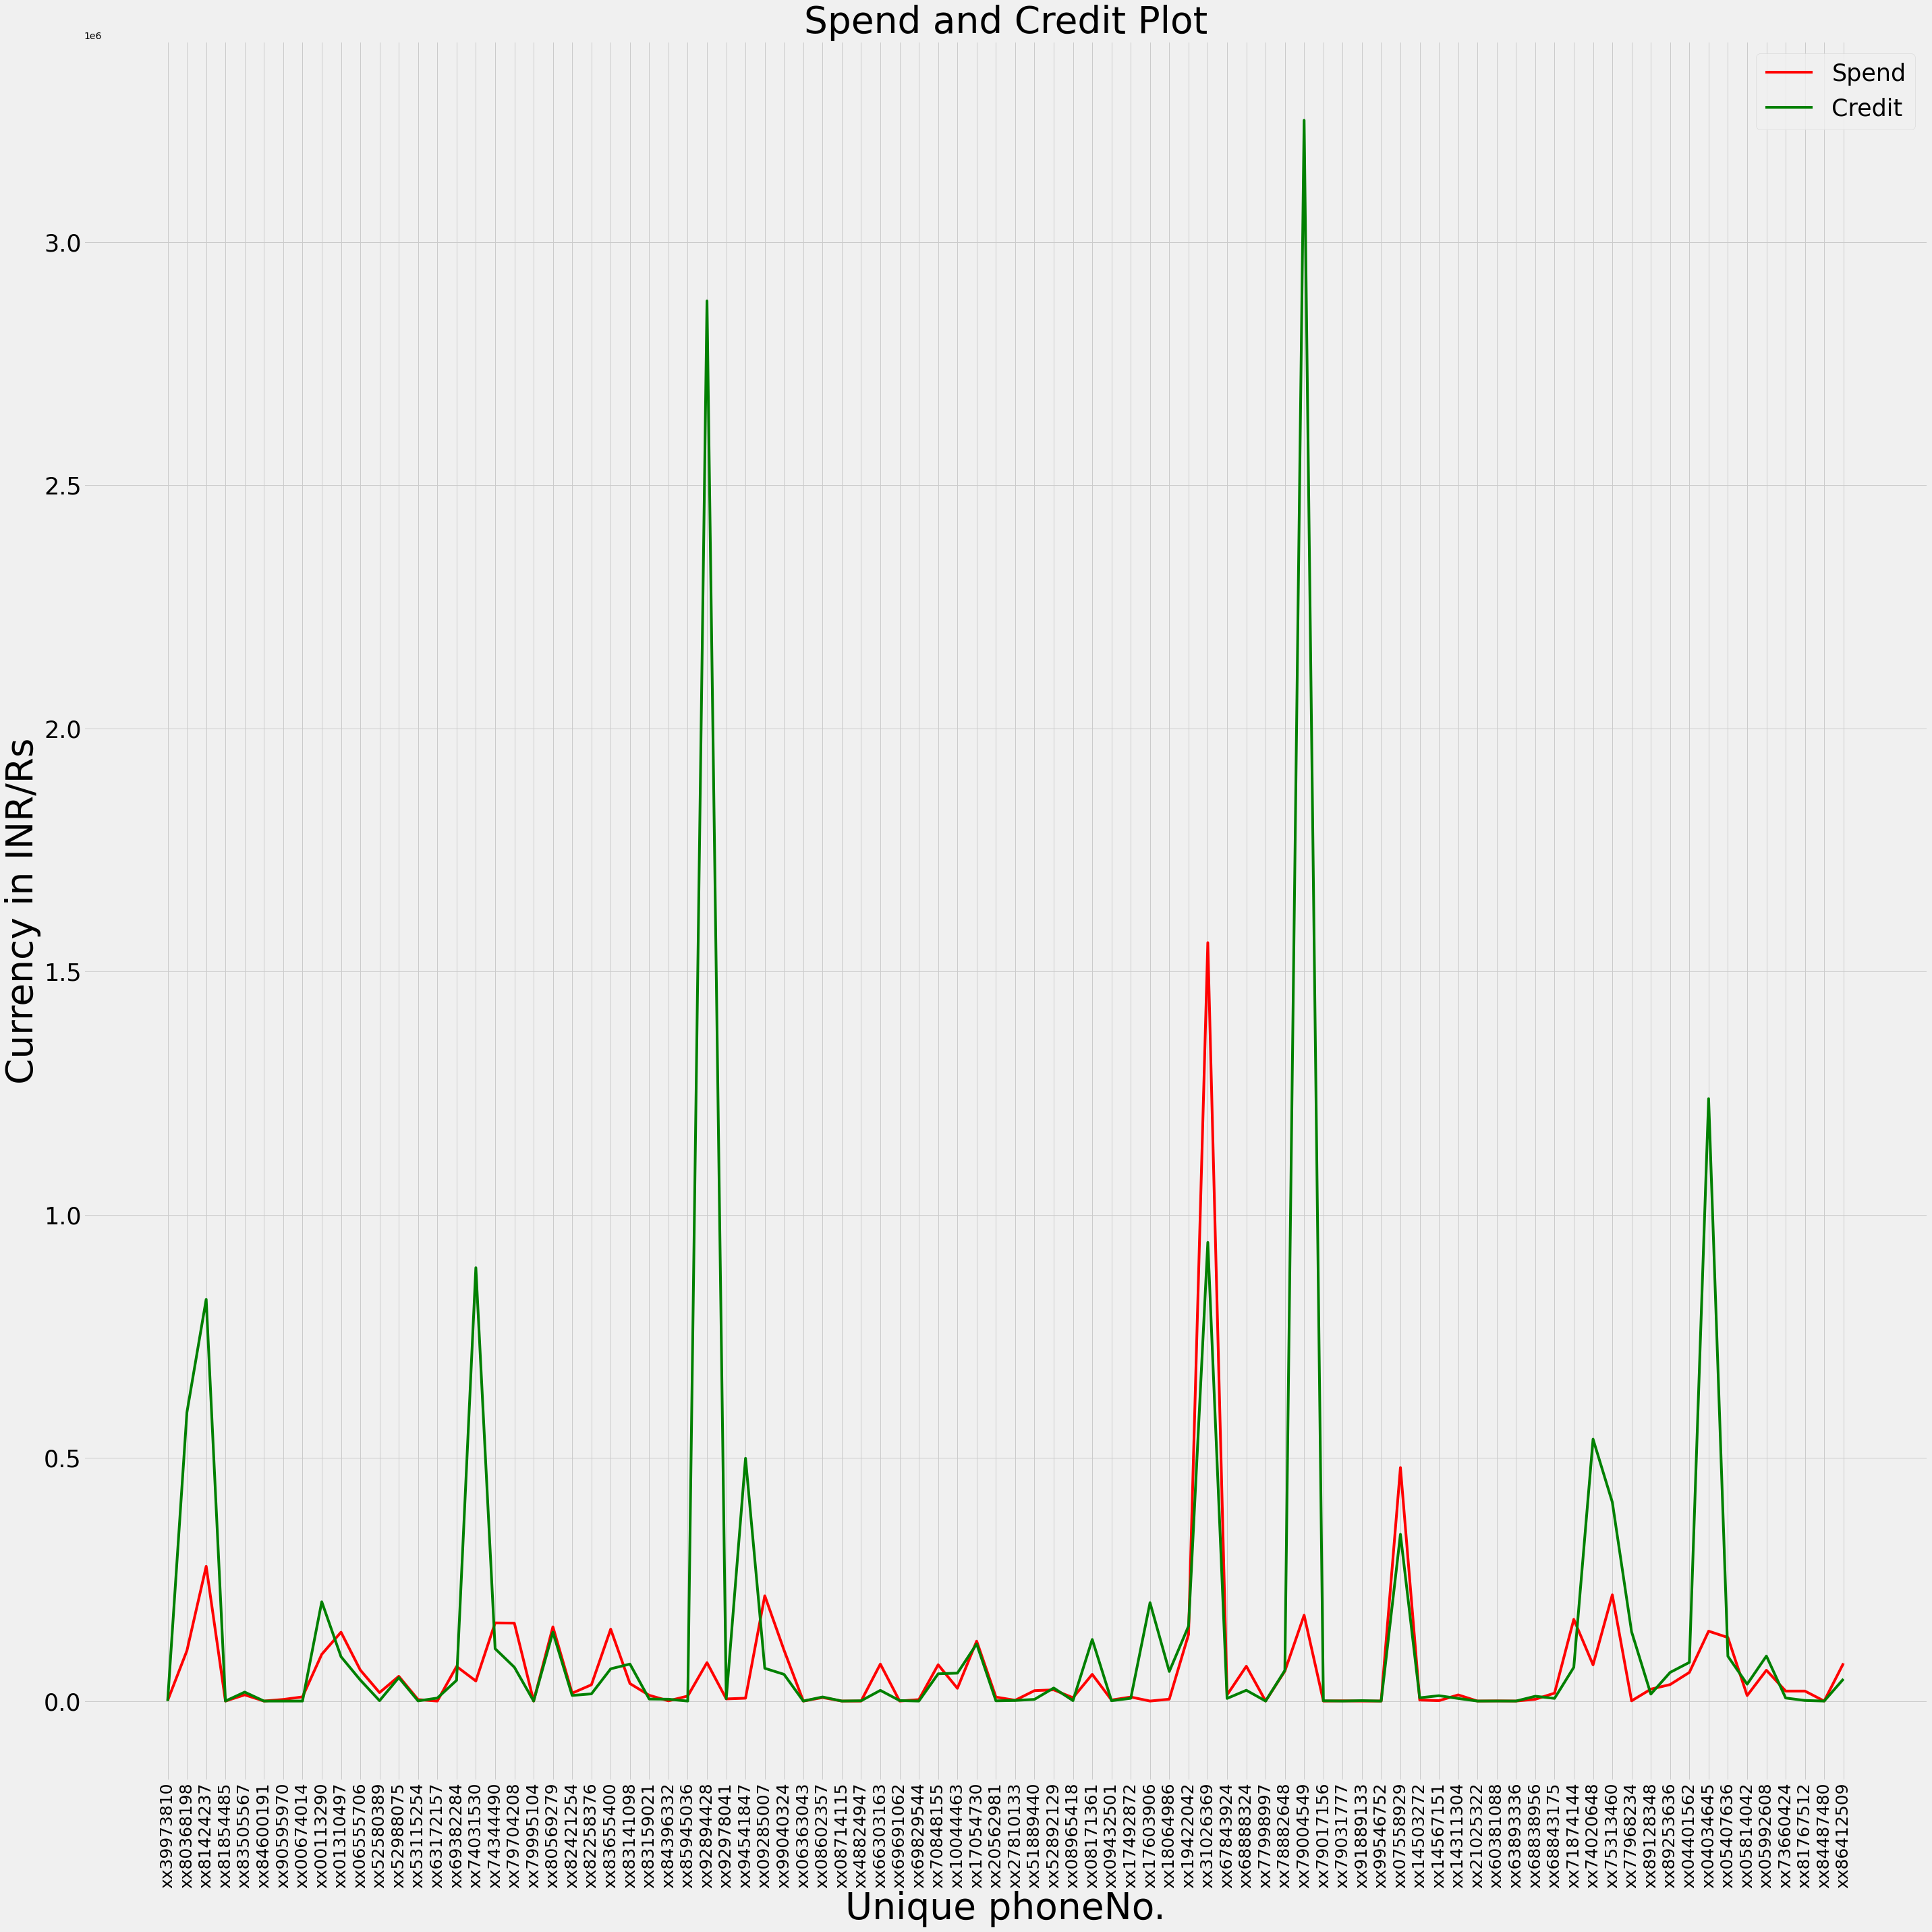

In [90]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(40,40))
plt.plot(phoneNos,spend_records,'r',label='Spend')
plt.plot(phoneNos,credit_records,'g',label = 'Credit')
plt.xlabel("Unique phoneNo.",fontsize= 55)
plt.ylabel("Currency in INR/Rs",fontsize=55)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=35 )
plt.title("Spend and Credit Plot",fontsize= 55)
plt.legend(prop={'size': 35})
plt.tight_layout()
plt.show()

### Calculating the count of riders that have positive cash inflow
* Positive cash inflow suggests that the rider is spending less than he/she is earning

In [91]:
positive_inflow=0;
for i in range(88):
    if(credit_records[i]>spend_records[i]):
        positive_inflow+=1;
positive_inflow

37

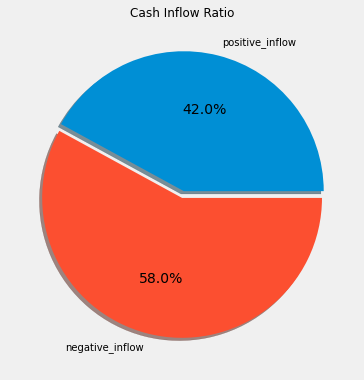

In [92]:
plt.style.use('seaborn-notebook')
slices=[positive_inflow,88-positive_inflow]
labels= ['positive_inflow','negative_inflow']
explode=[0.05,0]
plt.pie(slices,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title("Cash Inflow Ratio")
plt.tight_layout()
plt.show()

* 37 of 88 have a positive cash inflow

### Calculating the number of riders that have emi or loans over them (approved/ repaying)

In [93]:
emi_loan_count=0
for index,key in txn_gb:
    for line in (key['text']):
        if 'emi' in line or 'loan' in line :
            emi_loan_count+=1
            break

emi_loan_count

67

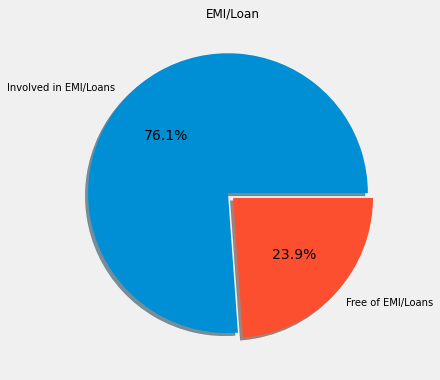

In [94]:
plt.style.use('seaborn-notebook')
slices=[emi_loan_count,88-emi_loan_count]
labels= ['Involved in EMI/Loans','Free of EMI/Loans']
explode=[0.05,0]
plt.pie(slices,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title("EMI/Loan")
plt.tight_layout()
plt.show()

* 67 of 88 are involved in EMI/Loan (accepted/repaying)

### Transactions - Income/Expenditure

In [95]:
spend_txn=[]
for index,key in txn_gb:
    spend_count =0
    for val in (key['spend']):
        if val>0:
            spend_count+=1
    spend_txn.append(spend_count)

print(spend_txn)

[4, 244, 256, 0, 54, 0, 11, 4, 164, 285, 172, 96, 109, 1, 0, 175, 113, 191, 365, 0, 30, 47, 104, 139, 65, 20, 8, 36, 115, 20, 15, 311, 155, 0, 56, 0, 0, 197, 0, 2, 19, 29, 442, 18, 3, 9, 100, 7, 152, 3, 27, 0, 6, 289, 2420, 21, 24, 0, 41, 239, 0, 1, 0, 0, 335, 4, 2, 14, 0, 2, 0, 8, 64, 108, 176, 252, 4, 24, 29, 39, 225, 100, 14, 73, 20, 3, 1, 101]


In [96]:
credit_txn=[]
for index,key in txn_gb:
    credit_count =0
    for val in (key['credit']):
        if val>0:
            credit_count+=1
    credit_txn.append(credit_count)

print(credit_txn)

[0, 74, 59, 0, 33, 1, 1, 0, 28, 27, 110, 10, 44, 6, 7, 73, 47, 87, 185, 1, 35, 20, 46, 126, 35, 4, 7, 0, 110, 5, 37, 145, 43, 0, 31, 0, 1, 52, 1, 0, 14, 15, 400, 1, 2, 12, 41, 3, 90, 4, 15, 7, 3, 37, 525, 8, 23, 0, 32, 199, 2, 2, 1, 0, 144, 10, 2, 8, 0, 1, 0, 1, 18, 105, 70, 89, 19, 20, 67, 22, 190, 214, 28, 50, 14, 2, 1, 43]


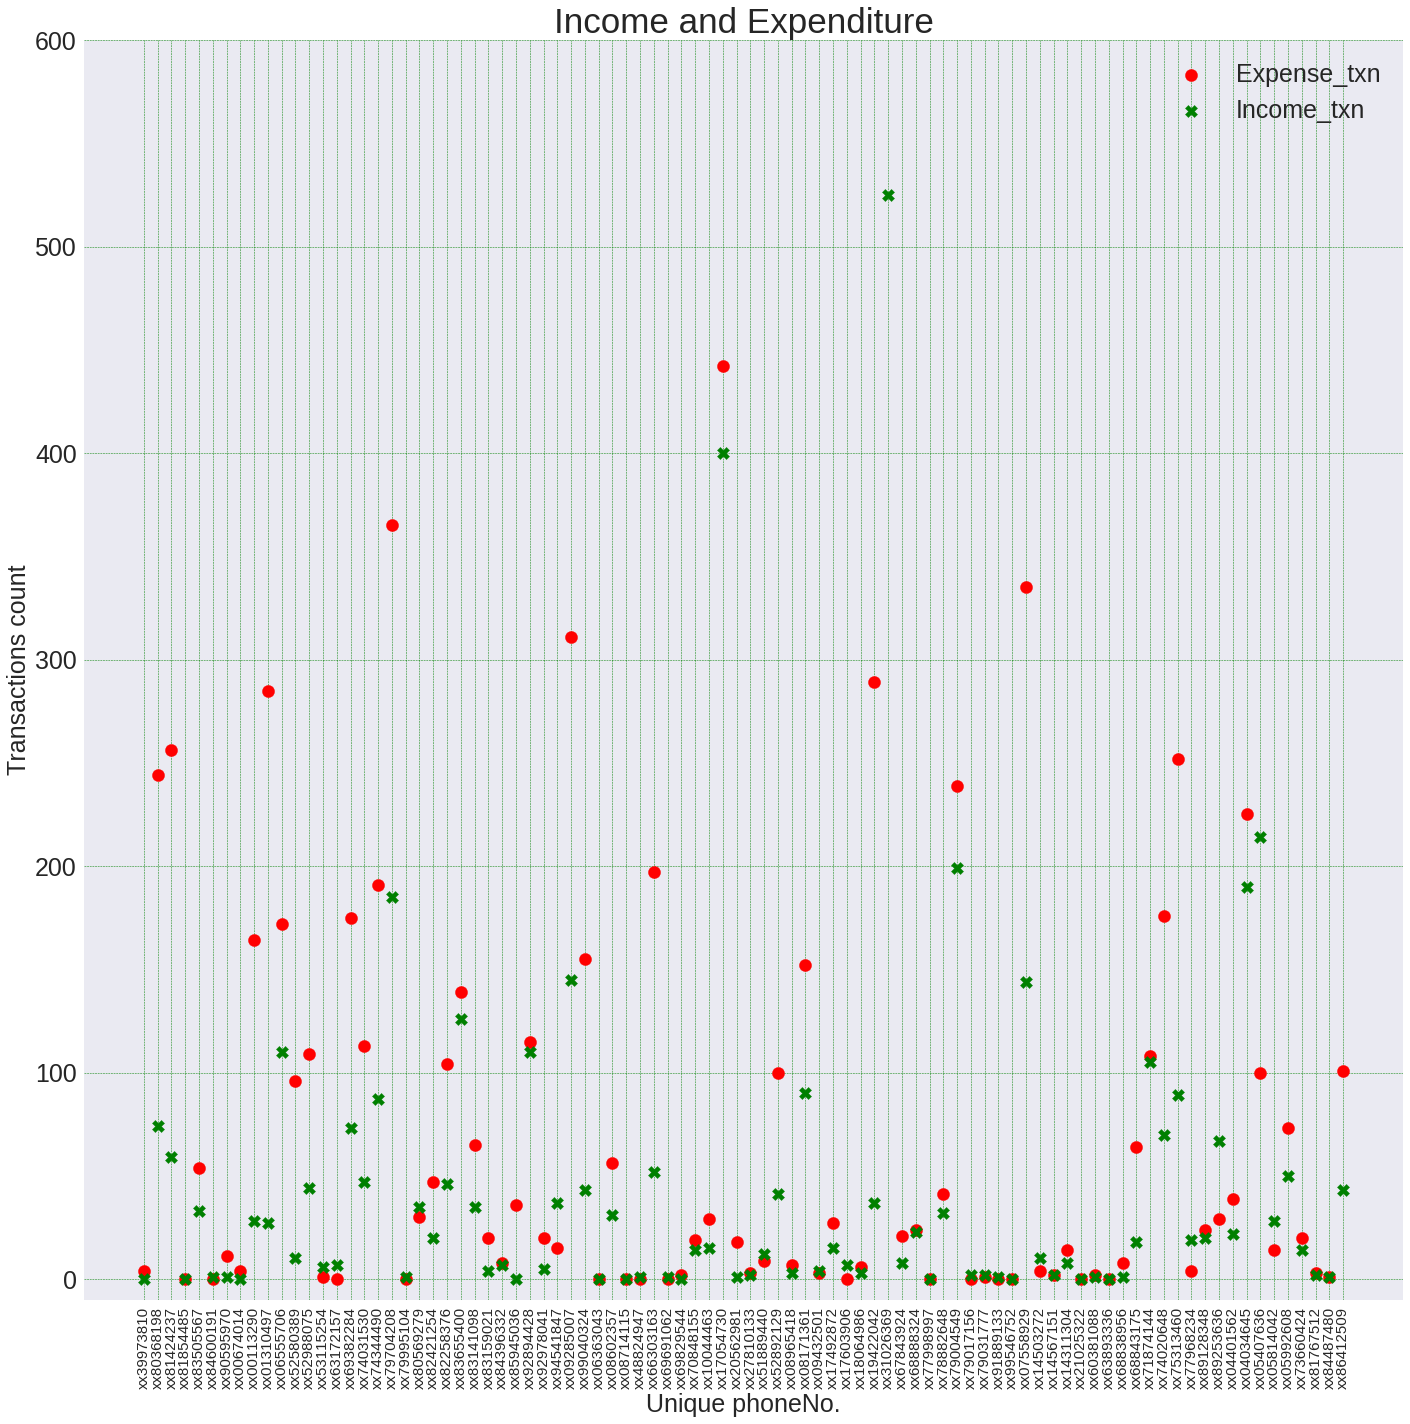

In [97]:
plt.style.use('seaborn')
plt.figure(figsize=(20,20))
plt.scatter(phoneNos,spend_txn,c='r',s=150)
plt.scatter(phoneNos,credit_txn,c='g',s=150,marker='X')
plt.xlabel("Unique phoneNo.",fontsize=25)
plt.ylabel("Transactions count",fontsize=25)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=25 )
plt.title("Income and Expenditure",fontsize= 35)
plt.legend(['Expense_txn','Income_txn'],prop={'size': 25})
plt.tight_layout()
plt.ylim([-10,600])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()